In [31]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.integrate import solve_ivp
import sys
import importlib

from Broth_model import *
from Plaque_model import *
from Swimming_model import *
from Initial_values import *
from Plotters import *

# Figure 1

## A

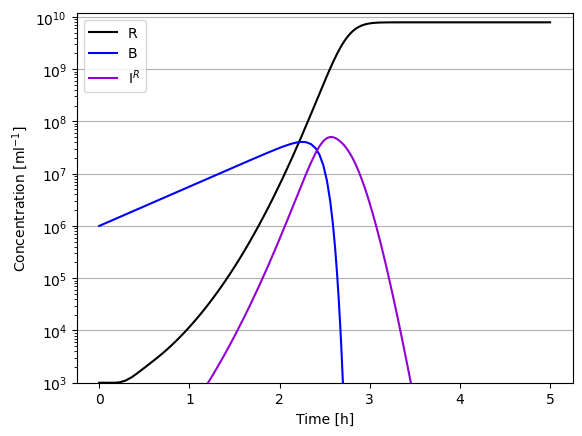

In [2]:
#Fetch default parameter values 
V = DV() 
model = "M0"

#Option to change parameter values (see Initial_values.py)
#V.f_tau = 10 #Example

#Fetch initial values 
y0 = IV(model)

#Set simulation length (mins)
t = 15*V.tau0

#Run simulation
M0sol = solve_ivp(M0,[0,t],y0,args = Const(V,model))

#Plot
BrothPlotter(model,V,M0sol.t,M0sol.y, scale = "log",figtitle = model,plotn = False)

## B

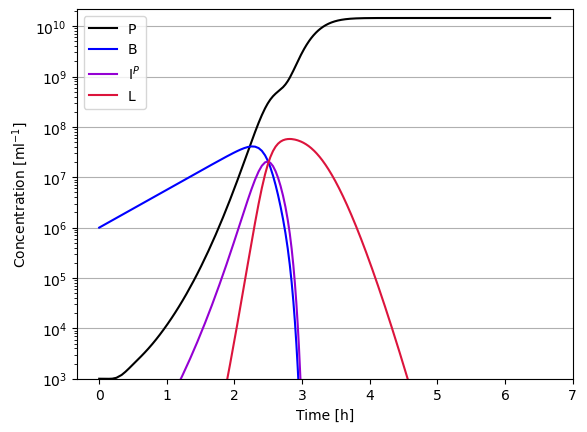

In [3]:
#Fetch default parameter values 
V = DV() 

#Option to change parameter values (see Initial_values.py)
#V.f_tau = 10

#Fetch initial values 
y0 = IV("M1")

#Set simulation length (mins)
t = 20*V.tau0

#Run simulation
M1sol = solve_ivp(M1,[0,t],y0,args = Const(V,"M1"))

#Plot
BrothPlotter("M1",V,M1sol.t,M1sol.y, scale = "log",figtitle = "M1",plotn=False)

# Fig 2

## A

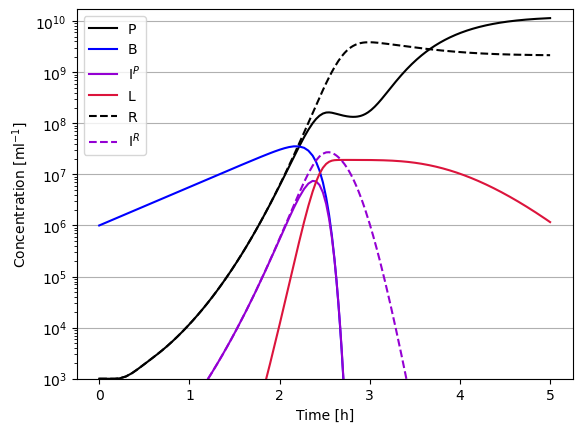

In [7]:
#Competition between wild type and r-mutant

V2 = DV() #Default values
V2.comp = 1 #Competition version
V2.f_beta, V2.f_tau = 5,5

#Intial values
y0 = IV("M1",comp = V2.comp)

#Simulation length (mins)
t = 5*60 

M1Csol = solve_ivp(M1,[0,t],y0,args = Const(V2,"M1"))
BrothPlotter("M1",V2,M1Csol.t,M1Csol.y,figtitle = "M1C",plotn = False)
#plt.ylim(1e3,5e10)

# Fig 3

## A

In [32]:
from Broth_model import *
from Plaque_model import *
from Swimming_model import *
from Initial_values import *
from Plotters import *

100%|██████████| 112500/112500 [00:04<00:00, 23655.95it/s]


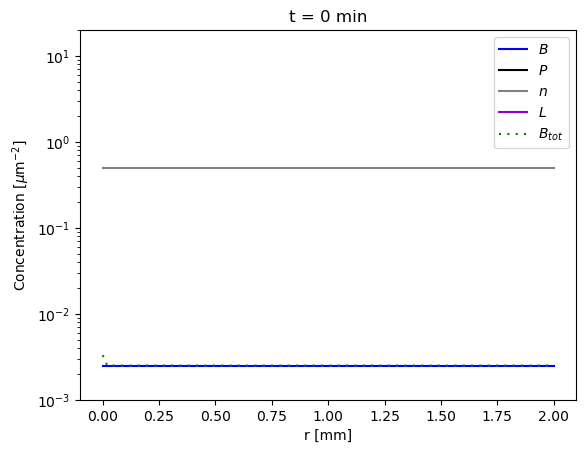

In [33]:
#r-mutant plaque

VR              = DVS(Rmax = 2*10**3,dr = 20) #Default values
y0R             = IVS("MP0",VR) #Intial values
t               = 5*60 #Simulation time
simR,savetimes = MPShell("MP0",y0R,VR,t)
GifGenerator(simR,savetimes,VR,"MP0",f"MP0",ylim = (0.001,20),legendloc = "upper right",Btot = True)

100%|██████████| 112500/112500 [00:10<00:00, 10538.31it/s]


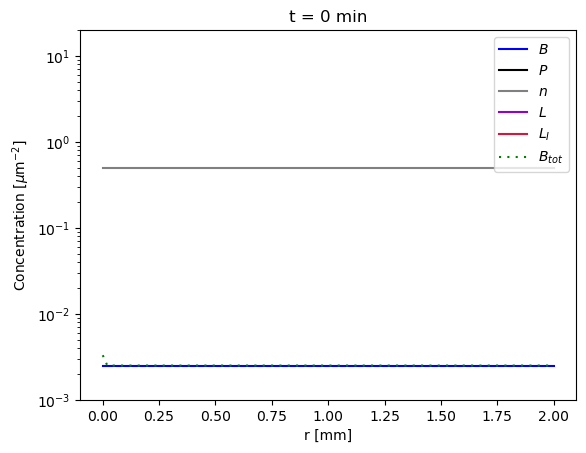

In [34]:
#Wild-type plaque

VP                  = DVS(Rmax = 2*10**3,dr = 20) #Default values
VP.f_beta,VP.f_tau  = 5,5
y0P                 = IVS("MP1",VP) #Intial values
simP,savetimes      = MPShell("MP1",y0P,VP,t)
GifGenerator(simP,savetimes,VP,"MP1",f"MP1",ylim = (0.001,20),legendloc = "upper right",Btot = True)

## B

In [78]:
#r-mutant plaque

VR2              = DVS(Rmax = 2*10**3,dr = 5) #Default values
y0R2             = IVS("MP0",VR2) #Intial values
t               = 5*60 #Simulation time
simR2,savetimes = MPShell("MP0",y0R2,VR2,t,save_interval=10)

100%|██████████| 1800000/1800000 [01:46<00:00, 16976.49it/s]


In [79]:
#Wild-type plaque

VP2                  = DVS(Rmax = 2*10**3,dr = 5) #Default values
VP2.f_beta,VP2.f_tau = 5,5
y0P2                 = IVS("MP1",VP2) #Intial values
simP2,savetimes      = MPShell("MP1",y0P2,VP2,t,save_interval=10)
#GifGenerator(simP2,savetimes,VP2,"MP1",f"MP1",ylim = (0.001,20),legendloc = "upper right",Btot = True)

100%|██████████| 1800000/1800000 [03:41<00:00, 8119.01it/s]


In [80]:
Pdetarr = Pdet(simR2,VR2,y0R2[0,0])
tarr = np.linspace(0,t,len(simR2))
rhalfarr = rhalf(simR2,False,VR2, var = "Btot")
Pfrontarr = Pfront(simR2,VR2)
ZOIarr = rhalf(simR2,False,VR2,var = "B")
rsuperarr = rsuper(simR2,VR2)

tarr1 = np.linspace(0,t,len(simP2))
rhalfarr1 = rhalf(simP2,True,VP2,var = "Btot")
Pfrontarr1 = Pfront(simP2,VP2,LIN = True)
ZOIarr1 = rhalf(simP2,True,VP2,var = "B")
Pdetarr1 = Pdet(simP2,VP2,y0P2[0,0])
rsuperarr1 = rsuper(simP2,VP2)


In [81]:
vrhalf = (rhalfarr[1:]-rhalfarr[:-1])/(tarr[1]-tarr[0])
vPfront = (Pfrontarr[1:]-Pfrontarr[:-1])/(tarr[1]-tarr[0])
vZOI = (ZOIarr[1:]-ZOIarr[:-1])/(tarr[1]-tarr[0])
vrsuper = (rsuperarr[1:]-rsuperarr[:-1])/(tarr[1]-tarr[0])
vPdet = (Pdetarr[1:]-Pdetarr[:-1])/(tarr[1]-tarr[0])
vrhalf1 = (rhalfarr1[1:]-rhalfarr1[:-1])/(tarr[1]-tarr[0])
vPfront1 = (Pfrontarr1[1:]-Pfrontarr1[:-1])/(tarr[1]-tarr[0])
vZOI1 = (ZOIarr1[1:]-ZOIarr1[:-1])/(tarr[1]-tarr[0])
vrsuper1 = (rsuperarr1[1:]-rsuperarr1[:-1])/(tarr[1]-tarr[0])
vPdet1 = (Pdetarr1[1:]-Pdetarr1[:-1])/(tarr[1]-tarr[0])

In [82]:
for i,v in enumerate(vrsuper):
    if v >= max(vrsuper)*0.8:
        expansionstart = tarr[i]
        break
for i,v in enumerate(vrsuper[::-1]):
    if v >= max(vrsuper)*0.85:
        expansionend = tarr[-i-2]
        break
expansionstart,expansionend

for i,v in enumerate(vrsuper1):
    if v >= max(vrsuper1)*0.8:
        expansionstart1 = tarr[i]
        break
for i,v in enumerate(vrsuper1[::-1]):
    if v >= max(vrsuper1)*0.85:
        expansionend1 = tarr[-i-2]
        break
expansionstart1,expansionend1

(82.75862068965517, 165.51724137931035)

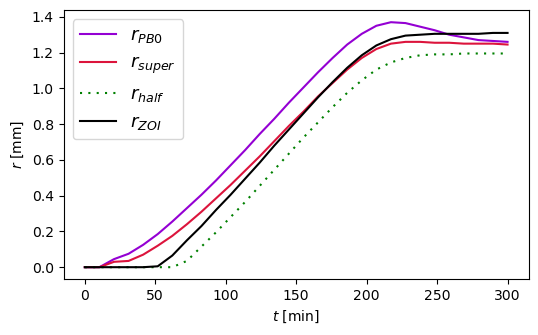

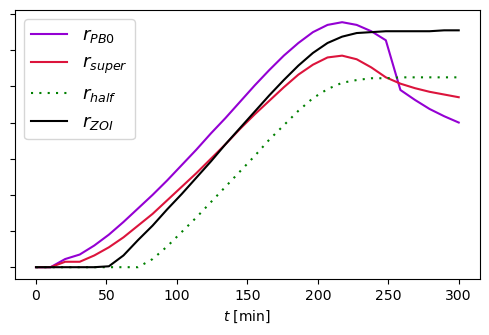

In [83]:
plt.figure(figsize = (6,3.5))
#plt.plot(tarr,Pfrontarr,label = r"$r_{front}$",color = "k")
plt.plot(tarr,Pdetarr,label = r"$r_{PB0}$",color = "darkviolet")
plt.plot(tarr,rsuperarr,label = r"$r_{super}$",color = "crimson")
plt.plot(tarr,rhalfarr,label = r"$r_{half}$",color = "green",ls = (0,(1,3)))
plt.plot(tarr,ZOIarr,label = r"$r_{ZOI}$",color = "k")
plt.xlabel(r"$t$ [min]")
plt.ylabel(r"$r$ [mm]")
plt.legend(fontsize = 13)
plt.savefig("MP0expansion.jpg")
#plt.title("MP0")

plt.figure(figsize = (6,3.5))
#plt.plot(tarr,Pfrontarr1,label = r"$r_{front}$",color = "k")
plt.plot(tarr,Pdetarr1,label = r"$r_{PB0}$",color = "darkviolet")
plt.plot(tarr,rsuperarr1,label = r"$r_{super}$",color = "crimson")
plt.plot(tarr,rhalfarr1,label = r"$r_{half}$",color = "green",ls = (0,(1,3)))
plt.plot(tarr,ZOIarr,label = r"$r_{ZOI}$",color = "k")
plt.xlabel(r"$t$ [min]")
#plt.ylabel(r"$r$ [mm]")
plt.legend(fontsize = 13)
plt.savefig("MP1expansion.jpg")
plt.yticks([0,0.2,0.4,0.6,0.8,1,1.2,1.4],[None,None,None,None,None,None,None,None])
#plt.title("MP1")
plt.show()

In [16]:
vrhalf = (rhalfarr[1:]-rhalfarr[:-1])/(tarr[1]-tarr[0])
vPfront = (Pfrontarr[1:]-Pfrontarr[:-1])/(tarr[1]-tarr[0])
vZOI = (ZOIarr[1:]-ZOIarr[:-1])/(tarr[1]-tarr[0])
vrsuper = (rsuperarr[1:]-rsuperarr[:-1])/(tarr[1]-tarr[0])
vPdet = (Pdetarr[1:]-Pdetarr[:-1])/(tarr[1]-tarr[0])
vrhalf1 = (rhalfarr1[1:]-rhalfarr1[:-1])/(tarr[1]-tarr[0])
vPfront1 = (Pfrontarr1[1:]-Pfrontarr1[:-1])/(tarr[1]-tarr[0])
vZOI1 = (ZOIarr1[1:]-ZOIarr1[:-1])/(tarr[1]-tarr[0])
vrsuper1 = (rsuperarr1[1:]-rsuperarr1[:-1])/(tarr[1]-tarr[0])
vPdet1 = (Pdetarr1[1:]-Pdetarr1[:-1])/(tarr[1]-tarr[0])

In [17]:
for i,v in enumerate(vrsuper):
    if v >= max(vrsuper)*0.8:
        expansionstart = tarr[i]
        break
for i,v in enumerate(vrsuper[::-1]):
    if v >= max(vrsuper)*0.85:
        expansionend = tarr[-i-2]
        break
expansionstart,expansionend

for i,v in enumerate(vrsuper1):
    if v >= max(vrsuper1)*0.8:
        expansionstart1 = tarr[i]
        break
for i,v in enumerate(vrsuper1[::-1]):
    if v >= max(vrsuper1)*0.85:
        expansionend1 = tarr[-i-2]
        break
expansionstart1,expansionend1

(75.0, 150.0)

Text(0.5, 1.0, 'MP1')

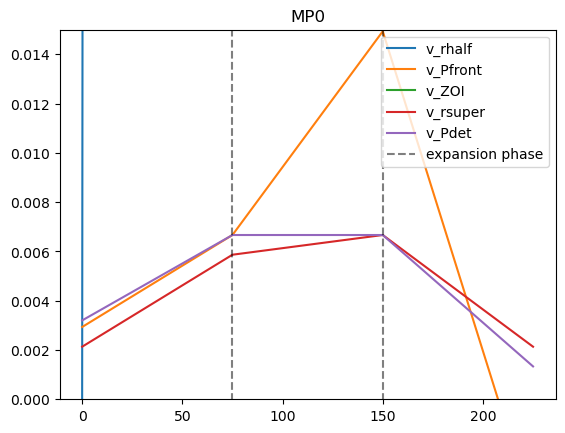

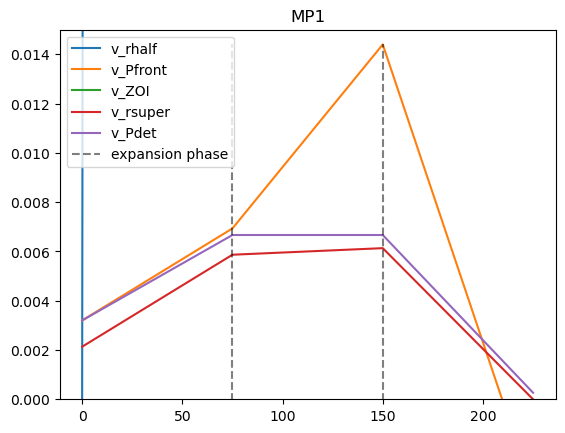

In [18]:
plt.plot(tarr[:-1],vrhalf,label = "v_rhalf")
plt.plot(tarr[:-1],vPfront,label = "v_Pfront")
plt.plot(tarr[:-1],vZOI,label = "v_ZOI")
plt.plot(tarr[:-1],vrsuper,label = "v_rsuper")
plt.plot(tarr[:-1],vPdet,label = "v_Pdet")
plt.plot(np.ones(10)*expansionstart,np.linspace(min(vPfront),max(vPfront),10),label = "expansion phase",ls = "--",color = "k",alpha = 0.5)
plt.plot(np.ones(10)*expansionend,np.linspace(min(vPfront),max(vPfront),10),ls = "--",color = "k",alpha = 0.5)
plt.legend()
plt.ylim(0,0.015)
plt.title("MP0")

plt.figure()
plt.plot(tarr[:-1],vrhalf1,label = "v_rhalf")
plt.plot(tarr[:-1],vPfront1,label = "v_Pfront")
plt.plot(tarr[:-1],vZOI1,label = "v_ZOI")
plt.plot(tarr[:-1],vrsuper1,label = "v_rsuper")
plt.plot(tarr[:-1],vPdet1,label = "v_Pdet")
plt.plot(np.ones(10)*expansionstart1,np.linspace(min(vPfront1),max(vPfront1),10),label = "expansion phase",ls = "--",color = "k",alpha = 0.5)
plt.plot(np.ones(10)*expansionend1,np.linspace(min(vPfront1),max(vPfront1),10),ls = "--",color = "k",alpha = 0.5)
plt.legend()
plt.ylim(0,0.015)
plt.title("MP1")

In [ ]:
# Kode fra den oprindelige parameterscan

#import numpy as np
#import matplotlib.pyplot as plt
#import matplotlib as mpl
#from tqdm import tqdm
#import sys
#sys.path.insert(-1,"/nbi/nbicmplx/cell/dhm160/Masters-thesis/")
#from Plaque_model import *
#from Initial_values import *
#from Plotters import *
#
#size = 19
#ftarr = np.linspace(1,10,size)
#fbarr = np.linspace(1,10,size)
#
#ZOIarr = np.empty((size,size))
#sizearr = np.empty((size,size))
#
#V = DVS(Rmax = 1.5*10**3)
#y0 = IVS("MP1",V)
#t = 6*60
#
#for it,ft in enumerate(ftarr):
#    print(f"Progress = {it/size}")
#    V.f_tau = ft
#    for ib,fb in enumerate(fbarr):
#        V.f_beta = fb
#        sim = MPShell("MP1",y0,V,t)
#        ZOIarr[it,ib] = rhalf(sim,LIN = True,V=V,var = "B")[-1]
#        sizearr[it,ib] = rhalf(sim,LIN = True,V=V,var = "Btot")[-1]

#np.savetxt("MP1ZOI.csv", ZOIarr, delimiter=",")
#np.savetxt("MP1plaquesize.csv", sizearr, delimiter=",")

In [12]:
lastframe   = simP[-1]
Btot        = np.sum(lastframe[:11], axis = 0)
B           = lastframe[0]
rhalf       = (np.where(Btot >= Btot[-1]/2)[0][0])*VP.dr
rZOI        = (np.where(B > B[-1]/2)[0][0])*VP.dr
rhalf,rZOI

(1192, 1306)

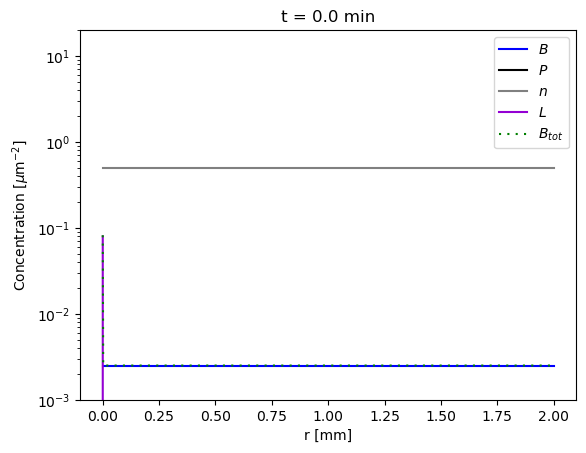

In [13]:
GifGenerator(simP,VP,t,"MP0",f"MP0",ylim = (0.001,20),legendloc = "upper right",Btot = True)

In [9]:
#Wild type plaque

VP2         = DVS(Rmax = 2*10**3,dr = 2)
VP2.f_beta  = 4
VP2.f_tau   = 1
y0          = IVS("MP1",VP2)
t           = 5*60
simP2       = MPShell("MP1",y0,VP2,t)

100%|██████████| 11249999/11249999 [25:38<00:00, 7314.15it/s]


In [14]:
lastframe2  = simP2[-1]
Btot2       = np.sum(lastframe2[:21], axis = 0)
B2          = lastframe2[0]
rhalf2      = (np.where(Btot2 >= Btot2[-1]/2)[0][0])*VP2.dr #Convert to mm
rZOI2       = (np.where(B2 > B2[-1]/2)[0][0])*VP2.dr #Convert to mm
rhalf2/rhalf,rZOI2/rZOI

(0.9697986577181208, 0.9908116385911179)

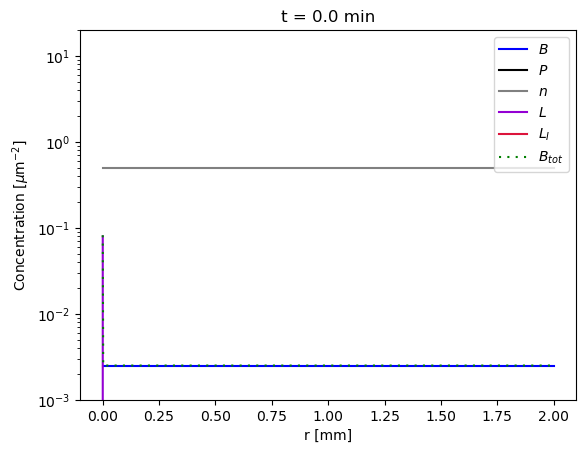

In [15]:
GifGenerator(simP2,VP2,t,"MP1",f"MP1",ylim = (0.001,20),legendloc = "upper right",Btot = True)

# Swimming model

In [32]:
#r-mutant swimming plate

#Set parameters
rho = 4*1e6 #Richness of the swimming medium - has a large effect on the simulation outcome
VS = DVS(dr = 20,rho = rho,Rmax = 40*10**3)

#Default values
y0 = IVS("MS0",VS)

#Start simulation
t = 20*60
simS = MSShell("MS0",y0,VS,t)

100%|██████████| 450000/450000 [13:27<00:00, 557.58it/s]


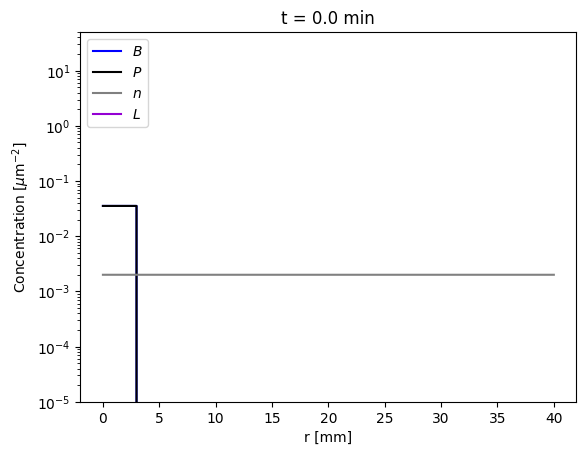

In [33]:
GifGenerator(simS,VS,t,"MS0",name = "MS0",ylim = (1e-5,50))

In [36]:
#Wild-type swimming plate

#Set parameters
rho = 4*1e6
VS2 = DVS(dr = 20,rho = rho,Rmax = 40*10**3)

#Default values
y0 = IVS("MS1",VS2)

#Start
t = 20*60
simS2 = MSShell("MS1",y0,VS2,t)

100%|██████████| 450000/450000 [20:52<00:00, 359.17it/s]


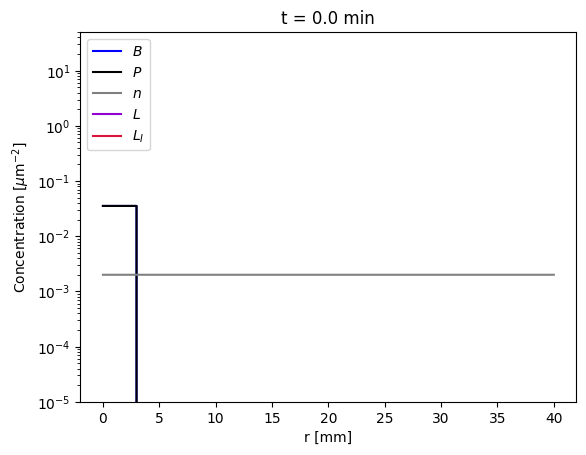

In [37]:
GifGenerator(simS2,VS2,t,"MS1",name = "MS1",ylim = (1e-5,50))